In [1]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [2]:
import pandas as pd

#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')

first_data_adera

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [4]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera3
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [5]:
first_data_adera["Cancer_type"].unique()

array(['Testicular_Germ_Cell_Tumors', 'Cervical_Squamous_Cell_Carcinoma',
       'Esophageal_Adenocarcinoma', 'Renal_Clear_Cell_Carcinoma',
       'Head_and_Neck_Squamous', 'Serous_Ovarian_Cancer',
       'Colorectal_Adenocarcinoma', 'Liver_Hepatocellular_Carcinoma',
       'Breast_Invasive_Ductal_Carcinoma', 'Stomach_Adenocarcinoma',
       'Uterine_Corpus_Endometrial_Carcinoma',
       'Diffuse_Large B-Cell_Lymphoma', 'Cholangiocarcinoma',
       'Uveal Melanoma', 'Bladder_Urothelial_Carcinoma', 'Sarcoma',
       'Prostate_Adenocarcinoma', 'Lung', 'Adrenocortical_Carcinoma',
       'Glioblastoma_Multiforme', 'Skin_Cutaneous_Melanoma',
       'Brain_Lower_Grade_Glioma'], dtype=object)

In [6]:
First_data_adera3a= first_data_adera3[first_data_adera3['Cancer_type'] == 'Renal_Clear_Cell_Carcinoma']
First_data_adera3b1= first_data_adera3[first_data_adera3['Cancer_type'] == 'Bladder_Urothelial_Carcinoma']
#First_data_adera3b2= first_data_adera3[first_data_adera3['Cancer_type'] == 'Cholangiocarcinoma']
#First_data_adera3b3= first_data_adera3[first_data_adera3['Cancer_type'] == 'Stomach_Adenocarcinoma']

First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b1])


In [7]:
First_data_adera3c['Cancer_type'].unique()

array(['Renal_Clear_Cell_Carcinoma', 'Bladder_Urothelial_Carcinoma'],
      dtype=object)

In [8]:
import pandas as pd

# Create a dictionary with the data
data = {
    'chromosome': [1],
    'start': [161070998],
    'end': [161089558],
    'CNA': ['AMP'],
    'strand': [3]
}

# Create the DataFrame
df_adera_validation = pd.DataFrame(data)

# Print the DataFrame
print(df_adera_validation)


   chromosome      start        end  CNA  strand
0           1  161070998  161089558  AMP       3


In [9]:
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(First_data_adera3c["CNA"])
Adera_CNA= encoder.transform(First_data_adera3c["CNA"])

Adera_CNA1= to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(First_data_adera3c ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=First_data_adera3c['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=First_data_adera3c['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=First_data_adera3c['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=First_data_adera3c['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=First_data_adera3c['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)
#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape
Output_net_Adera=First_data_adera3c[["Cancer_type"]]
Output_net_Adera

from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
encoder.fit(First_data_adera3c[["Cancer_type"]])
Output_net_Adera1 = encoder.transform(First_data_adera3c[["Cancer_type"]])

Output_net_Adera2= to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [10]:

Output_net_Adera2= to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])

In [11]:
Output_net_Adera2.shape
Output_net_Adera2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types
Output_net_Adera3


array([[[[0., 1.]]],


       [[[0., 1.]]],


       [[[0., 1.]]],


       ...,


       [[[1., 0.]]],


       [[[1., 0.]]],


       [[[1., 0.]]]], dtype=float32)

In [13]:
import numpy as np
import tensorflow.keras.backend as K
from scipy.optimize import brentq
from scipy.interpolate import interp1d


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fp(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)

def fn(y_true, y_pred):
    return K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

def tp(y_true, y_pred):
    return K.sum(K.cast(y_true*y_pred, 'float'), axis=0)

def tn(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)


def p(y_true, y_pred):
    p = tp(y_true, y_pred) / (tp(y_true, y_pred) + fp(y_true, y_pred) + K.epsilon())
    return K.mean(p)

def r(y_true, y_pred):
    r = tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred) + K.epsilon())
    return K.mean(r)



def f1(y_true, y_pred):
    p = tp(y_true, y_pred) / (tp(y_true, y_pred) + fp(y_true, y_pred) + K.epsilon())
    r = tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred) + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    return K.mean(f1)

def eer(y_true, y_pred):
    fpr = fp(y_true, y_pred)
    tpr = tp(y_true, y_pred)
    threshold = 0.5
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    return eer

In [14]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
import numpy as np

In [ ]:
result_file = open("results_adera1.txt", "w")
result_file.write(" test_adera")
result_file.close()

In [25]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import SpecificityAtSensitivity, AUC
#from tensorflow.keras import regularizers
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)

from random import sample

class_0_indices = np.where(Output_net_Adera3 == 0)[0]
class_1_indices = np.where(Output_net_Adera3 == 1)[0]

num_samples_class_0 = len(class_0_indices)
num_samples_class_1 = len(class_1_indices)

target_size = min(num_samples_class_0, num_samples_class_1)

undersampled_indices = np.concatenate([
    sample(class_0_indices.tolist(), target_size),
    class_1_indices
])

Input_Adera_undersampled = Input_Adera_numpy2[undersampled_indices]
Output_net_Adera_undersampled = Output_net_Adera3[undersampled_indices]




grace_model = tf.keras.Sequential([

 #tf.keras.layers.Dense(2, activation='softmax'),
 #tf.keras.layers.Dense(2, activation='relu'),
 tf.keras.layers.Dense(2, activation='softplus')


      ])





optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-3, clipnorm = .08)
grace_model.compile(optimizer=optimizer_Adera, loss='CategoricalFocalCrossentropy', metrics=[ 'accuracy', SpecificityAtSensitivity(0.5),AUC()  ])

#grace_model.compile(optimizer=optimizer_Adera, loss='binary_crossentropy', metrics=['accuracy',p,r,f1])
k_adera = grace_model.fit(Input_Adera_undersampled, Output_net_Adera_undersampled, verbose=1, validation_split=0.49, epochs=90, batch_size=20, callbacks=[es_ADERA])
#k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=200,batch_size=10, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8

Epoch 1/90
50/50 [==============================] - 2s 22ms/step - loss: 0.0378 - accuracy: 0.6901 - specificity_at_sensitivity_3: 0.7233 - auc_3: 0.6561 - val_loss: 0.0367 - val_accuracy: 0.7657 - val_specificity_at_sensitivity_3: 0.7605 - val_auc_3: 0.6825
Epoch 2/90
50/50 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.7304 - specificity_at_sensitivity_3: 0.7374 - auc_3: 0.6723 - val_loss: 0.0358 - val_accuracy: 0.7364 - val_specificity_at_sensitivity_3: 0.7605 - val_auc_3: 0.6799
Epoch 3/90
50/50 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.7183 - specificity_at_sensitivity_3: 0.7525 - auc_3: 0.6734 - val_loss: 0.0353 - val_accuracy: 0.7374 - val_specificity_at_sensitivity_3: 0.7699 - val_auc_3: 0.6850
Epoch 4/90
50/50 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.7193 - specificity_at_sensitivity_3: 0.7495 - auc_3: 0.6777 - val_loss: 0.0347 - val_accuracy: 0.7322 - val_specificity_at_sensitivi

3/3 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.9467 - p: 0.5668 - r: 0.5497 - f1: 0.5405


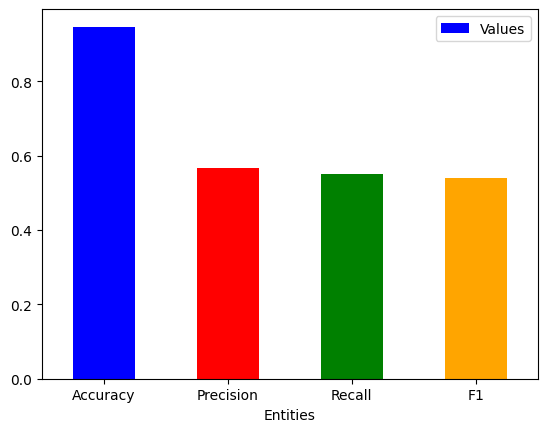

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
import matplotlib.pyplot as plot
#MODEL1
data_adera4 = pd.DataFrame({'Entities':['Accuracy', 'Precision', 'Recall', 'F1'],
        'Values':[0.9097, 0.6134, 0.6149 , 0.6060]})
#MODEL2
data_adera4 = pd.DataFrame({'Entities':['Accuracy', 'Precision', 'Recall', 'F1'],
        'Values':[0.9467, 0.5668, 0.5497 , 0.5405]})
adera_colours=['blue', 'red', 'green', 'orange']
#adera_results=pd.DataFrame(data_adera4)
ax = data_adera4.plot.bar(x='Entities', y='Values', rot=0,color=adera_colours)

3/3 [==============================] - 0s 6ms/step - loss: 0.1357 - accuracy: 0.9969


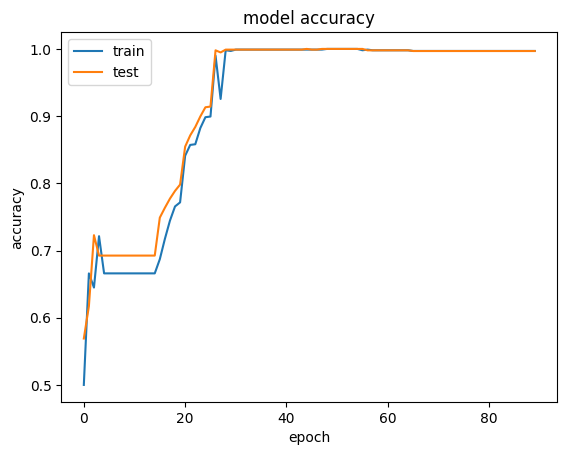

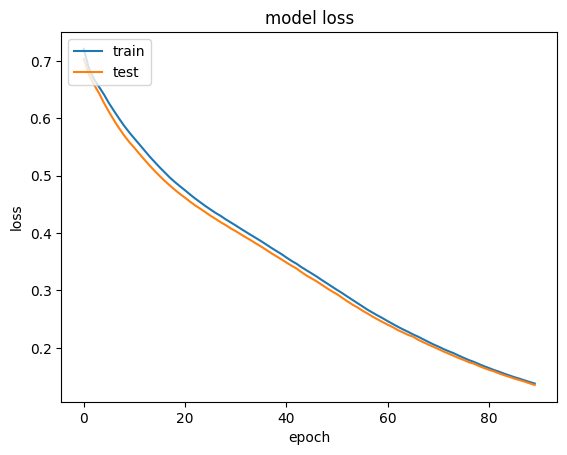

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()


In [26]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)

3/3 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.9559 - specificity_at_sensitivity_3: 0.9826 - auc_3: 0.9261


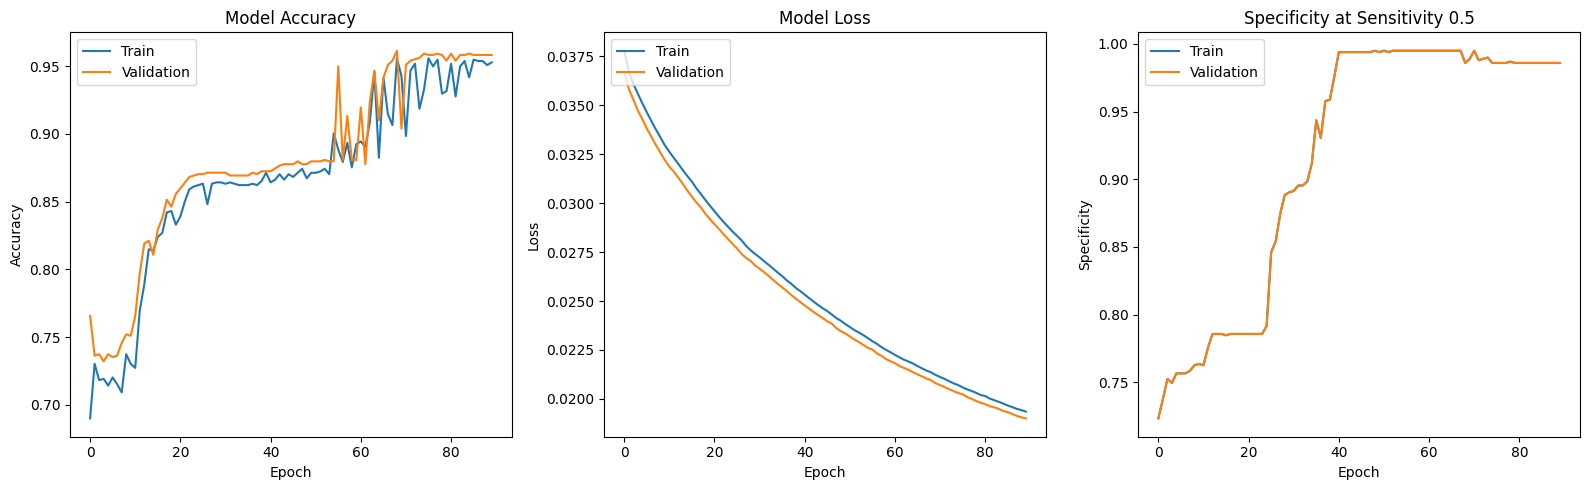

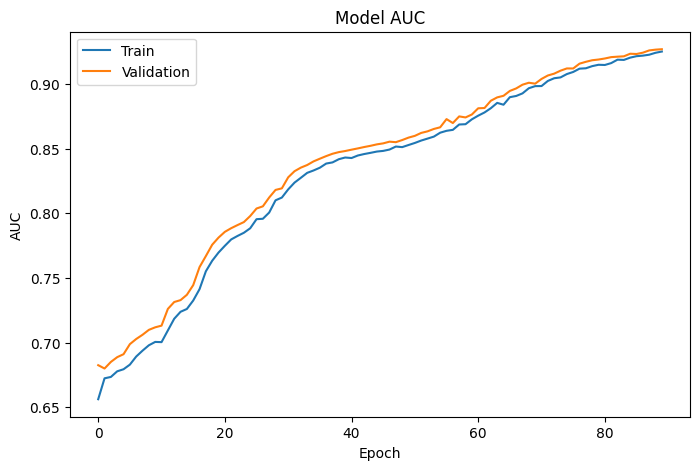

In [27]:
# Plotting multiple metrics
plt.figure(figsize=(16, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Specificity at Sensitivity 0.5
plt.subplot(1, 3, 3)
plt.plot(k_adera.history['specificity_at_sensitivity_3'])
plt.plot(k_adera.history['specificity_at_sensitivity_3'])
plt.title('Specificity at Sensitivity 0.5')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot AUC
plt.figure(figsize=(8, 5))
plt.plot(k_adera.history['auc_3'])
plt.plot(k_adera.history['val_auc_3'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

grace_model.save("adera+_27_feb+Makarious")


In [ ]:
adera_47_40_model = tf.keras.saving.load_model("adera+_27_feb+Makarious")
test_mac=Input_Adera_numpy2[5].reshape(1, 1, 1, 8)
adera_47_40_model.predict(test_mac)

1/1 [==============================] - 0s 42ms/step
adera_result= [[[[0.99678546 0.00255662]]]]
1/1 [==============================] - 0s 43ms/step
adera_result= [[[[0.61627173 0.3834532 ]]]]
1/1 [==============================] - 0s 39ms/step
adera_result= [[[[0.200465   0.81196856]]]]
1/1 [==============================] - 0s 38ms/step
adera_result= [[[[0.200465   0.81196856]]]]
1/1 [==============================] - 0s 47ms/step
adera_result= [[[[0.6821459  0.31488052]]]]
1/1 [==============================] - 0s 37ms/step
adera_result= [[[[0.79848653 0.1950958 ]]]]
1/1 [==============================] - 0s 43ms/step
adera_result= [[[[9.9945086e-01 4.0426329e-04]]]]
1/1 [==============================] - 0s 34ms/step
adera_result= [[[[0.72989595 0.26544684]]]]
1/1 [==============================] - 0s 52ms/step
adera_result= [[[[0.20867868 0.80379415]]]]
1/1 [==============================] - 0s 40ms/step
adera_result= [[[[0.68273383 0.31427014]]]]
1/1 [=============================

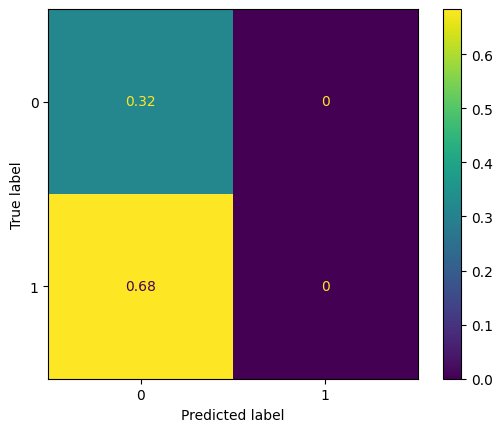

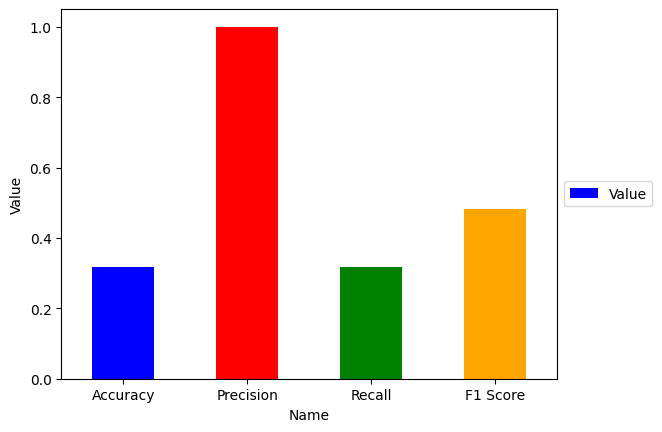

In [ ]:
First_data_adera3c["Cancer_type"].unique()
data_adera= {
    "types":First_data_adera3c["Cancer_type"].unique(),
    "values": [0, 1]
}

data_adera

import random
#from np_utils import to_categorical


 # print(adera_test)
#Input_Adera_numpy2[adera_test].shape
#data_adera

threshold = 0.1 # Set the threshold for prediction

num_runs = 3
accuracies = []
y_true_adera=[]
y_pred_adera=[]
for run in range(num_runs):
    adera_test = [random.randint(0, Adera_chromosome4.shape[0]-1) for _ in range(99)]
    correct_predictions = 0
    total_predictions = 0

    for adera_test1 in adera_test:
        test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
        adera_result = adera_47_40_model.predict(test_mac)
        print("adera_result=",adera_result)


        adera_result_thresholded = (adera_result >= threshold).astype(int)
        adera_result5 = np.argmax(adera_result_thresholded)
       # print("adera_result5=",adera_result5)
        y_true_adera.append(First_data_adera3c['Cancer_type'].iloc[adera_test1])
        y_pred_adera.append(data_adera['types'][adera_result5])
        #if data_adera['types'][adera_result5] == First_data_adera3c['Cancer_type'].iloc[adera_test1]:
            #print("data_adera['types'][adera_result5] =", data_adera['types'][adera_result5])
           # print("data_adera['types'][adera_result5]=",data_adera['types'][adera_result5])
           # correct_predictions += 1

        #total_predictions += 1

    #accuracy = correct_predictions / total_predictions
    #accuracies.append(accuracy)

#mean_accuracy = np.mean(accuracies)
#std_accuracy = np.std(accuracies)

print(y_true_adera)
print(y_pred_adera)
#print("Standard deviation of accuracy:", std_accuracy)

from sklearn.metrics import confusion_matrix

print(y_true_adera)
print(y_pred_adera)

##y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
 ##y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
mkr1=confusion_matrix(y_true_adera, y_pred_adera, labels=[First_data_adera3c["Cancer_type"].unique()[0], First_data_adera3c["Cancer_type"].unique()[1]],normalize='all')

#array([[2, 0, 0],
 #      [0, 0, 1],
   #3    [1, 0, 2]])
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

mkr1_display = ConfusionMatrixDisplay(mkr1).plot()

accuracy_adera= (mkr1[0][0] + mkr1[1][1]) / (mkr1[0][0] + mkr1[1][1]+mkr1[0][1] + mkr1[1][0])

print(accuracy_adera)

precsioin_adera= (mkr1[0][0]) / (mkr1[0][1]+mkr1[0][0] )
print(precsioin_adera)

recal_adera= (mkr1[0][0]) / (mkr1[0][0] + mkr1[1][0])
print(recal_adera)


f1_adera=2*(precsioin_adera*recal_adera)/(precsioin_adera+recal_adera)
print(f1_adera)


data_adera=[]
from matplotlib import cm
adera_colours=['blue', 'red', 'green', 'orange']

import pandas as pd

# intialise data of lists.
data_adera = pd.DataFrame({'Name':['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Value':[accuracy_adera, precsioin_adera, recal_adera, f1_adera]})

# Create DataFrame
#data_adera2 = pd.DataFrame(data_adera)

# Print the output.
#data_adera2.plot()
plot = data_adera.plot(x='Name', y='Value', rot=0, kind="bar", ylabel="Value",color=adera_colours)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [ ]:
import pandas as pd

# Create a dictionary with the data
data = {
    'chromosome': [1],
    'start': [161070998],
    'end': [161089558],
    'CNA': ['AMP'],
    'strand': [3]
}

# Create the DataFrame
df_adera_validation = pd.DataFrame(data)

# Print the DataFrame
print(df_adera_validation)


   chromosome      start        end  CNA  strand
0           1  161070998  161089558  AMP       3


In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_adera_validation["CNA"])
Adera_CNA= encoder.transform(df_adera_validation["CNA"])

Adera_CNA1= np_utils.to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(df_adera_validation['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=df_adera_validation['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=df_adera_validation['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=df_adera_validation['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=df_adera_validation['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)


#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape

(1, 8)

In [ ]:
adera_47_40_model.predict(Input_test_Adera)

1/1 [==============================] - 0s 78ms/step


array([[[[1.0000000e+00, 2.8505384e-12]]]], dtype=float32)